## Importando as bibliotecas

In [1]:
from IPython.display import display, Markdown
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Carregando os dados

In [39]:
df = pd.read_csv('../data/raw/data.csv')
dicionario = pd.read_csv('../data/external/dictionary.csv')
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


## Histograma das variáveis (sem tratamento de dados)

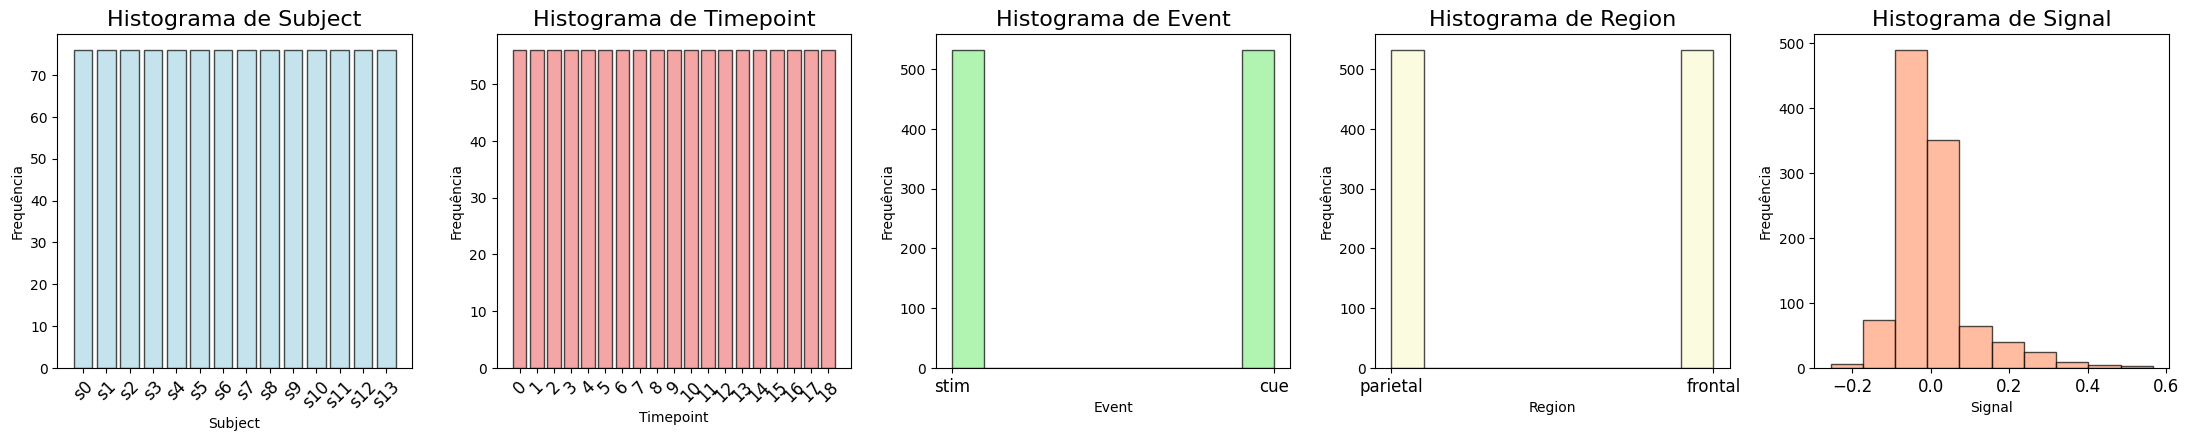

In [88]:
subject_counts = df['subject'].value_counts()
subject_counts = subject_counts.sort_index()
ordered_subjects = ['s{}'.format(i) for i in range(len(subject_counts))]

plt.figure(figsize=(22, 8))

# Histograma da variável 'subject'
plt.subplot(2, 5, 1)
plt.bar(ordered_subjects, subject_counts.values, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Subject', fontsize=16)
plt.xlabel('Subject')
plt.ylabel('Frequência')
plt.xticks(rotation=45, fontsize=12)  

# Histograma da variável 'timepoint'
plt.subplot(2, 5, 2)
plt.bar(timepoint_counts.index, timepoint_counts.values, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Histograma de Timepoint', fontsize=16)
plt.xlabel('Timepoint')
plt.ylabel('Frequência')
plt.xticks(np.arange(0, 19, 1), rotation=45, fontsize=12)  

# Histograma da variável 'event'
plt.subplot(2, 5, 3)
plt.hist(df['event'], color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Histograma de Event', fontsize=16)
plt.xlabel('Event')
plt.ylabel('Frequência')
plt.xticks(fontsize=12)  

# Histograma da variável 'region'
plt.subplot(2, 5, 4)
plt.hist(df['region'], color='lightgoldenrodyellow', edgecolor='black', alpha=0.7)
plt.title('Histograma de Region', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Frequência')
plt.xticks(fontsize=12)  

# Histograma da variável 'signal'
plt.subplot(2, 5, 5)
plt.hist(df['signal'], color='lightsalmon', edgecolor='black', alpha=0.7)
plt.title('Histograma de Signal', fontsize=16)
plt.xlabel('Signal')
plt.ylabel('Frequência')
plt.xticks(fontsize=12)  

plt.tight_layout()
plt.show()


##  Tratamento de dados Faltantes

Identificar e remover linhas/colunas com dados faltantes insignificantes. Imputar valores ausentes usando estatísticas de tendência central ou modelos preditivos.

In [25]:
missing_values = df.isnull().sum()
print(missing_values)

subject      0
timepoint    0
event        0
region       0
signal       0
dtype: int64


#### Não se aplica, pois não há dados faltantes.

## Tratamento de dados discrepantes

Tratamento de dados discrepantes: remover ou isolar outliers dependendo do contexto.

Resumo Estatístico antes da remoção dos outliers:
count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

Resumo Estatístico após a remoção dos outliers:
count    1040.000000
mean       -0.004821
std         0.076135
min        -0.255486
25%        -0.046889
50%        -0.014553
75%         0.019680
max         0.282222
Name: signal, dtype: float64


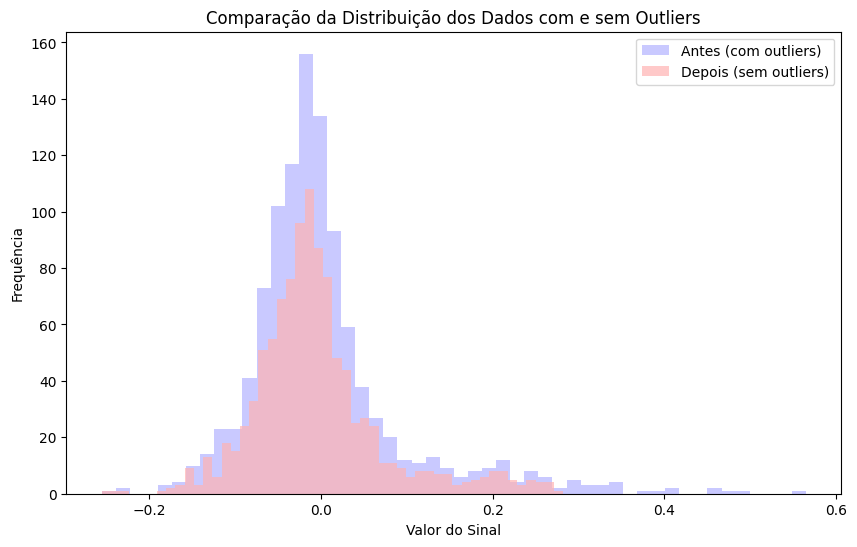

In [79]:
#O código está identificando e removendo outliers no conjunto de dados da coluna 'signal' usando o método do desvio padrão.
desvio_padrao = df['signal'].std()
limite_superior = df['signal'].mean() + 3 * desvio_padrao
limite_inferior = df['signal'].mean() - 3 * desvio_padrao
df_sem_outliers = df[(df['signal'] >= limite_inferior) & (df['signal'] <= limite_superior)]

print("Resumo Estatístico antes da remoção dos outliers:")
print(df['signal'].describe())
print("\nResumo Estatístico após a remoção dos outliers:")
print(df_sem_outliers['signal'].describe())

plt.figure(figsize=(10, 6))
plt.hist(df['signal'], bins=50, color=(0.7, 0.7, 1), alpha=0.7, label='Antes (com outliers)') 
plt.hist(df_sem_outliers['signal'], bins=50, color=(1, 0.7, 0.7), alpha=0.7, label='Depois (sem outliers)')  
plt.xlabel('Valor do Sinal')
plt.ylabel('Frequência')
plt.title('Comparação da Distribuição dos Dados com e sem Outliers')
plt.legend()
plt.show()

A remoção de outliers da variável signal foi realizada para garantir a estabilidade dos dados de FMRI e garantir análises mais precisas. Outliers podem distorcer os resultados e prejudicar a interpretação dos padrões de atividade cerebral, portanto, removê-los ajuda a manter a integridade dos dados e a confiabilidade das conclusões